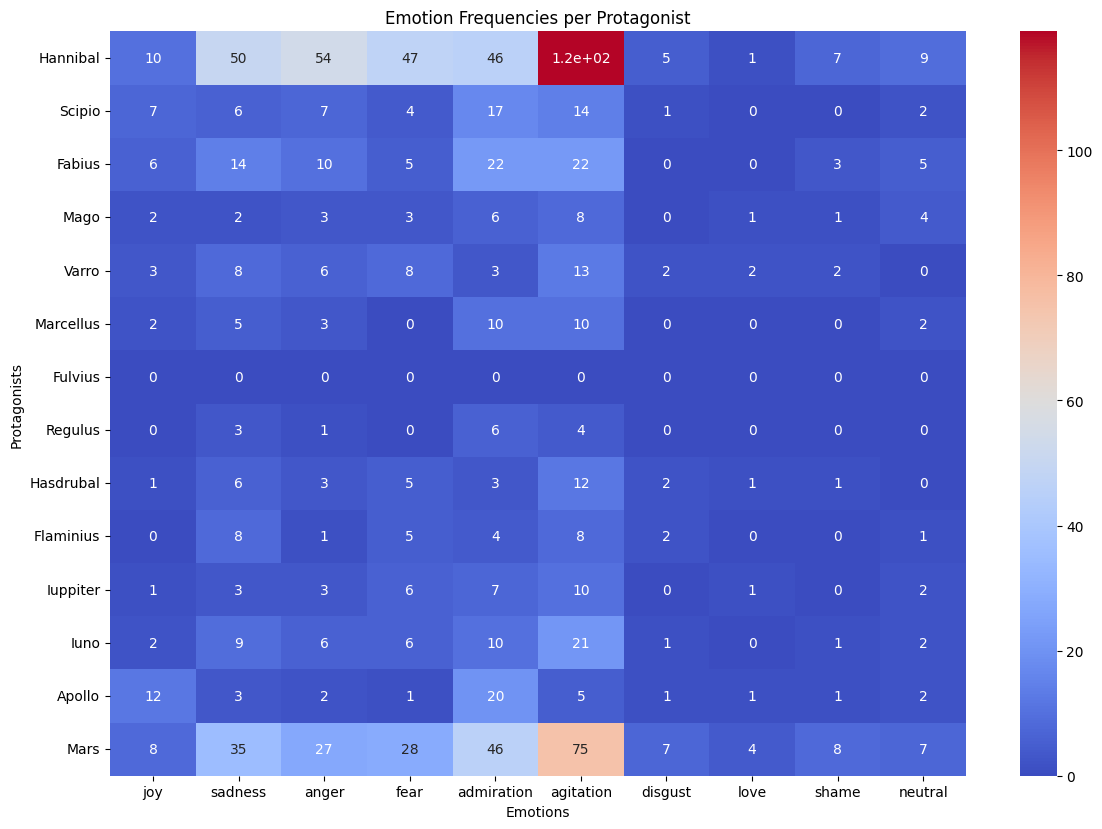

In [12]:
#Heatmap

import json
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load the JSON data ---
with open('../Analysis/punica_sentiments.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# --- Set up protagonists and emotions ---
protagonists = ['Hannibal', 'Scipio', 'Fabius', 'Mago', 'Varro', 'Marcellus', 'Fulvius', 'Regulus', 'Hasdrubal', 'Flaminius', 'Iuppiter', 'Iuno', 'Apollo', 'Mars']  
emotions = ['joy', 'sadness', 'anger', 'fear', 'admiration', 'agitation', 'disgust', 'love', 'shame', 'neutral']

# --- Initialize the emotion matrix ---
emotion_matrix = np.zeros((len(protagonists), len(emotions)), dtype=int)

# --- Fill the matrix ---
for i, protagonist in enumerate(protagonists):
    protagonist_data = data.get(protagonist)
    if protagonist_data:
        for occurrence in protagonist_data["occurrences"]:
            sentiments = occurrence.get("sentiments", "")
            if sentiments:
                parsed = ast.literal_eval(sentiments)  # safely parse the tuple string
                for emotion in parsed:
                    if emotion in emotions:
                        emotion_index = emotions.index(emotion)
                        emotion_matrix[i, emotion_index] += 1

num_protagonists = len(protagonists)
height = 0.6 * num_protagonists
width = 12

# --- Create a heatmap ---
plt.figure(figsize=(width, height))
sns.heatmap(emotion_matrix, annot=True, cmap="coolwarm", xticklabels=emotions, yticklabels=protagonists)
plt.title('Emotion Frequencies per Protagonist')
plt.xlabel('Emotions')
plt.ylabel('Protagonists')
plt.tight_layout()
plt.savefig('../plots/punica/punica_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
argonautica = ['Iason', 'Medea', 'Aeetes', 'Hercules', 'Hylas', 'Pollux', "Pelias", 'Iuppiter', 'Iuno', 'Minerva', 'Apollo', 'Mars']  
aeneid = ['Aeneas', 'Turnus', 'Ascanius', 'Anchises', 'Dido', 'Achates', 'Lavinia', 'Camilla', 'Iuppiter', 'Iuno', 'Minerva', 'Apollo', 'Mars']  
thebaid = ['Capaneus', 'Hippomedon', 'Tydeus', 'Creon', 'Adrastus', 'Amphion', 'Tisiphone', 'Antigone', 'Polynices', 'Eteocles', 'Iocasta', 'Amphiaraus', 'Theseus', 'Iuppiter', 'Iuno', 'Apollo', 'Mars']  
punica = ['Hannibal', 'Scipio', 'Fabius', 'Mago', 'Varro', 'Marcellus', 'Fulvius', 'Regulus', 'Hasdrubal', 'Flaminius', 'Iuppiter', 'Iuno', 'Apollo', 'Mars']  

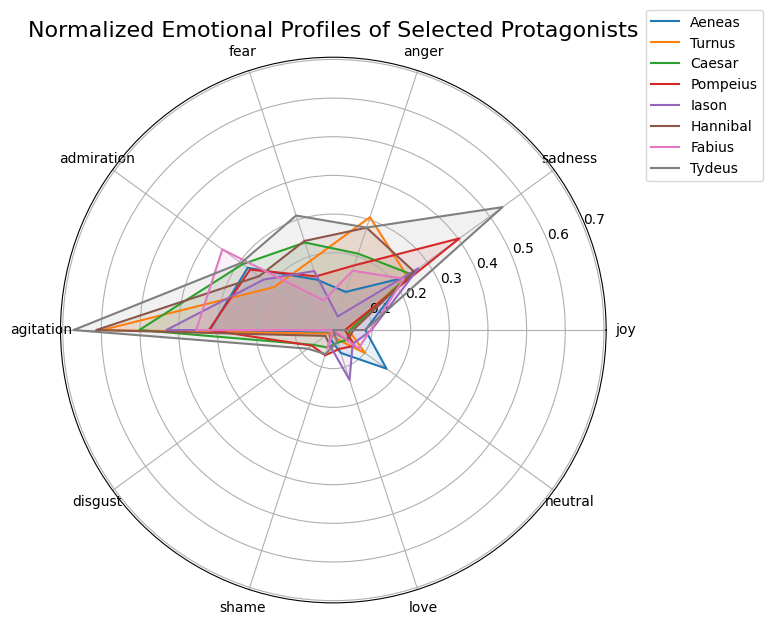

In [2]:
# Relative counts

import json
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# === MAPPING: protagonist → file path ===
file_paths = {
    'Aeneas': '../analysis/aeneid_sentiments.json',
    "Turnus": '../analysis/aeneid_sentiments.json',
    'Caesar': '../analysis/pharsalia_sentiments.json',
    'Pompeius': '../analysis/pharsalia_sentiments.json',
    'Iason': '../analysis/argonautica_sentiments.json',
    'Hannibal': '../analysis/punica_sentiments.json',
    'Fabius': '../analysis/punica_sentiments.json',
    'Tydeus': '../analysis/thebaid_sentiments.json'
}

emotions = ['joy', 'sadness', 'anger', 'fear', 'admiration', 'agitation', 'disgust', 'shame', 'love', 'neutral']

# === Initialize counts ===
emotion_counts = {protagonist: dict.fromkeys(emotions, 0) for protagonist in file_paths}
occurrence_counts = {protagonist: 0 for protagonist in file_paths}  # count total occurrences per protagonist

# === PROCESS each protagonist in its specific file ===
for protagonist, filepath in file_paths.items():
    with open(filepath, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    protagonist_data = data.get(protagonist)
    if protagonist_data:
        for occurrence in protagonist_data['occurrences']:
            occurrence_counts[protagonist] += 1  # count this occurrence
            sentiments_str = occurrence.get('sentiments', '')
            if sentiments_str:
                parsed = ast.literal_eval(sentiments_str)  # safely parse tuple string
                for emotion in parsed:
                    if emotion in emotions:
                        emotion_counts[protagonist][emotion] += 1
    else:
        print(f"⚠️ Warning: Protagonist '{protagonist}' not found in file '{filepath}'")

# === NORMALIZE counts by occurrence count ===
normalized_counts = {}
for protagonist in file_paths:
    total_occurrences = occurrence_counts[protagonist]
    if total_occurrences > 0:
        normalized_counts[protagonist] = {emotion: emotion_counts[protagonist][emotion] / total_occurrences for emotion in emotions}
    else:
        normalized_counts[protagonist] = {emotion: 0 for emotion in emotions}  # no occurrences → all zeros

# === PREPARE DATA FOR RADAR ===
labels = np.array(emotions)
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for protagonist in file_paths:
    counts = [normalized_counts[protagonist][e] for e in emotions]
    values = counts + counts[:1]  # close the loop
    ax.plot(angles, values, label=protagonist)
    ax.fill(angles, values, alpha=0.1)

ax.set_title('Normalized Emotional Profiles of Selected Protagonists', size=16)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.savefig('normalized_emotion_radar_chart_all.png', dpi=300, bbox_inches='tight')
plt.show()

In [3]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Prepare data matrix
protagonists = list(file_paths.keys())
data_matrix = np.array([ [normalized_counts[p][e] for e in emotions] for p in protagonists ])

# Compute similarity matrix
similarity_matrix = cosine_similarity(data_matrix)

# Put into a DataFrame for readability
similarity_df = pd.DataFrame(similarity_matrix, index=protagonists, columns=protagonists).round(3)

# Display
print(similarity_df)


          Aeneas  Turnus  Caesar  Pompeius  Iason  Hannibal  Fabius  Tydeus
Aeneas     1.000   0.895   0.937     0.936  0.946     0.902   0.962   0.908
Turnus     0.895   1.000   0.967     0.877  0.897     0.992   0.896   0.944
Caesar     0.937   0.967   1.000     0.931  0.940     0.987   0.942   0.972
Pompeius   0.936   0.877   0.931     1.000  0.913     0.896   0.927   0.963
Iason      0.946   0.897   0.940     0.913  1.000     0.917   0.909   0.938
Hannibal   0.902   0.992   0.987     0.896  0.917     1.000   0.913   0.966
Fabius     0.962   0.896   0.942     0.927  0.909     0.913   1.000   0.908
Tydeus     0.908   0.944   0.972     0.963  0.938     0.966   0.908   1.000
